In [1]:
import pandas, numpy
fpts = "timscanpoints/vg-off-quick.csv"
fpts = "timscanpoints/vg-off-slow.csv"
w = pandas.read_csv(fpts)
w.angle = ((w.angle+180)%360) - 180   # move to range [-180,180]
w.distance = w.distance/1000          # to metres

w["x"] = w.distance * numpy.sin(numpy.radians(w.angle))
w["y"] = w.distance * numpy.cos(numpy.radians(w.angle)) * numpy.cos(numpy.radians(w.angle_below_horizon))
w["z"] = -w.distance * numpy.cos(numpy.radians(w.angle)) * numpy.sin(numpy.radians(w.angle_below_horizon))
w = w[numpy.abs(w.angle)<55]
w = w[w.distance<2]
w = w[w.angle_below_horizon<45]
w.index = numpy.array(range(len(w)))



In [4]:
import ipyvolume as ipv
ipv.clear()
ipv.scatter(w.x, w.y, w.z, size=0.5)
lw = w.iloc[:-2000]
ipv.scatter(lw.x, lw.y, lw.z, size=0.5, color="blue")
ipv.show()


In [3]:
def fitplanetopoints(xs, ys, zs):
    points = numpy.array((xs, ys, zs))
    ctr = points.mean(axis=1)
    x = points - ctr[:,numpy.newaxis]
    M = numpy.dot(x, x.T) # Could also use np.cov(x) here.
    p0, v = ctr, numpy.linalg.svd(M)[0][:,-1]
    ers = ((xs-p0[0])*v[0] + (ys-p0[1])*v[1] + (zs-p0[2])*v[2])
    return p0, v, sum(ers**2)/len(ers)

fitplanetopoints(lw.x, lw.y, lw.z)


(array([-0.07578071,  1.50674846, -0.81989601]),
 array([0.00482236, 0.25561442, 0.96676678]),
 0.0007745397399170512)

In [6]:
anglesteps = numpy.linspace(-90, 90, 29)
anglehorizonsteps = numpy.linspace(0, 90, 20)
qx, qy, qz, vx, vy, vz = [ ], [ ], [ ], [ ], [ ], [ ]
for i in range(1, len(anglesteps)):
    for j in range(1, len(anglehorizonsteps)):
        lw = w[(w.angle>=anglesteps[i-1]) & (w.angle<=anglesteps[i]) & \
               (w.angle_below_horizon>=anglehorizonsteps[j-1]) & (w.angle_below_horizon<=anglehorizonsteps[j])]
        if len(lw) > 10:
            p0, v, er = fitplanetopoints(lw.x, lw.y, lw.z)
            if er < 0.01:
                qx.append(p0[0]); qy.append(p0[1]); qz.append(p0[2])
                vx.append(v[0]); vy.append(v[1]); vz.append(v[2])
            



In [7]:
ipv.clear()
#ipv.scatter(w.xm, w.ym, w.zm, size=0.2)
#lw = w[(w.xm>0.3) & (w.angle<40) & (w.angle_below_horizon<30)]
#ld = numpy.abs(((w.xm-p0[0])*v[0] + (w.y-p0[1])*v[1] + (w.zm-p0[2])*v[2]))
#lw = w[ld<0.01]

ipv.scatter(w.x.values, w.y.values, w.z.values, size=0.2, color="blue")
ipv.quiver(numpy.array(qx), numpy.array(qy), numpy.array(qz), 
           numpy.array(vx), numpy.array(vy), numpy.array(vz), size=5)
ipv.show()


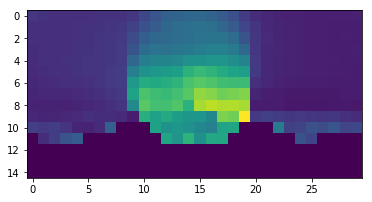

In [208]:
k = numpy.zeros((15, 30))
for ix, fx in enumerate(numpy.linspace(-1.5, 1.5, k.shape[1])):
    for iy, fy in enumerate(numpy.linspace(1.5, 0, k.shape[0])):
        bd = (w.x-fx)**2 + (w.y-fy)**2
        lw = w[bd<0.3]
        if len(lw)>10:
            p0, v, er = fitplanetopoints(lw.x, lw.y, lw.z)
            if er < 0.01:
                k[iy, ix] = 1-v[2]
plt.imshow(k)


In [ ]:
fevo = "/home/julian/data/aviansails/3Evo140-005-190503.csv"
import pandas
w = pandas.read_csv(fevo, names=["x", "y", "z"])
w.tail()
import ipyvolume as ipv
ipv.quickscatter(w.x, w.y, w.z)